<center>
    <img src="	https://www.marketplace.org/wp-content/uploads/2023/04/USdollar.jpg?w=720" width='70%' height='80%' > 
</center>

----------

<h1 align="center"> Bank Loan Marketing Strategy</h1>
 <h2 align="center"> - Analysis on converting customers - </h2> 
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>Vivian Kuang</font></center>
<br>

----------

Marketing is important to any business or companies. For those banks, they spend much money to attract new depositors and open new accounts. While, most accounts are not active. Even have minimum balance requirements, it brings more argument and consume time and money on both sides and destroy customer satisfactory. Why not coverting the exisitng depositors to loan customers which can bring much more profit to the bank as well as satisfy cusomters' personal finicial needs. In this project, I will solve a problem for classifying personal loans on the __Thera-Bank dataset__. 
* __The Backgound of Thera-Bank Dataset__: The management the Thera Bank wants to look for ways to convert its liability customers into retail loan customers while keeping them as depositors. The bank ran a campaign last year for deposit customers showed a conversion rate of over 9.6% success. This has prompted the retail marketing department to develop campaigns with better target marketing to increase the success rate with a minimal budget. The department would like to develop a classifier that will help them identify the potential customers who are more likely to purchase the loan. This will increase the success rate which brings more revenue, while reducing the cost of the marketing. The dataset was collected from the campaingn illustrated as the following:

The dataset contains both customer information and customer response to the last personal loan campaign with columns:

* __ID__: ID of the customer

* __Age__: Age of the customer in completed years

* __Experience__: Amount of work experience in years

* __Income__: Amount of annual income in thousands dollars

* __Zipcode__: Postal code in which the client lives

* __Family__: Number of the cusomer's family members

* __CCAvg__: Average monthly spending with the credit card in thousands dollars

* __Education__: Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)

* __Mortgage__: Value of home mortgage, if any in thousands dollars

* __Securities Account__: Does the customer have a securities account with the bank? (Yes 1, No 0)

* __CD Account__: Does the customer have a certificate of deposit account (CD) with the bank?(Yes 1, No 0)

* __Online__: Does the customer use the internet banking facilities?(Yes 1, No 0)

* __CreditCard__: Does the customer use a credit card issued by the bank?(Yes 1, No 0)

* __Personal Loan__: Did this customer accept the personal loan offered in the last campaign? (Target Variable)

__Objective:__ Build a models to predict the likelihood that a customer will buy a personal loan accurately. 

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Install and Import Libraries:</p>

In [1]:
#!pip install  pandas_profiling

In [2]:
import numpy as np
import pandas as pd
#import ydata_profiling
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone 
%matplotlib inline

from xgboost import XGBClassifier

# metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# saving the pipeline
import joblib

import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter

# pd.__version__

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Load the Dataset</p>

In [5]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">EDA(Exploratory data analysis)</p>

- What are the data types of each column?
- What are the null or different values of each column?
- What is the mean, median, and standard deviation of each column?
- What does the distribution for each feature look like?
- How features are correlated to the label

In [6]:
df.shape

(5000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
## very detailed report for analyzing the dataset with visualization and statistic reports

df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

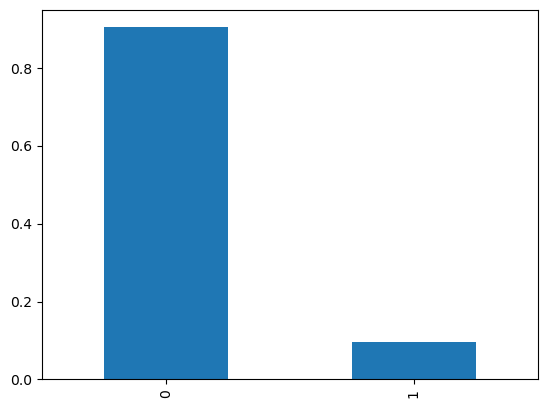

In [12]:
# we should see this soon after you start exploring the data
# it tells us that there is a large imbalance
# this imbalance will affect our training (SMOTE?)
# this imbalance will affect our metric  => not accuracy
df['Personal Loan'].value_counts(normalize=True).plot(kind='bar');

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Correlation Analysis</p>

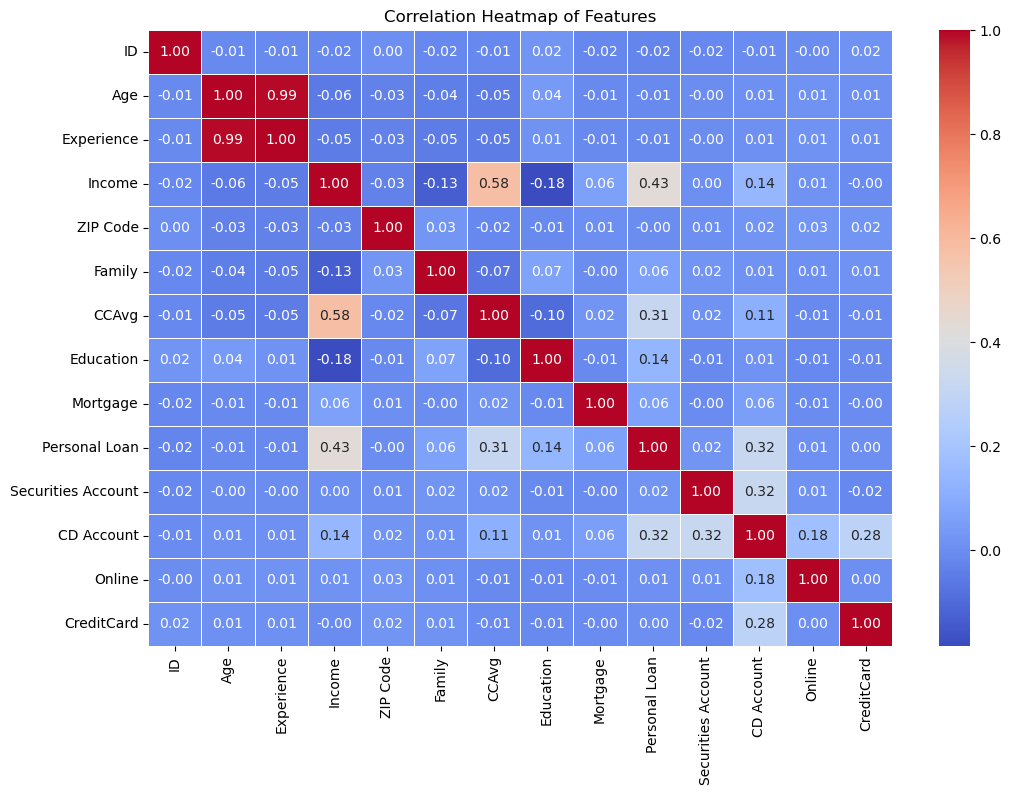

In [13]:
import seaborn as sns

# Filter out the numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr(method = 'spearman')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

- Experience feature is 99% correated with Age (keep one)
- Some featues Credit card, ZIP Code has not correlation with target Personal Loan
- Incom, CCAvg, CD Account are pretty correlated with the target

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Cleansing Data</p>

- Deal with no value and duplicate values
- Deal with noise data
- Deal with no important features 
- Deal with outliers 

In [14]:
#check empty values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
#check duplicated values
df[df.duplicated(keep=False)].sum()

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [16]:
df['ZIP Code'].value_counts().sort_index()

9307     1
90005    5
90007    6
90009    8
90011    3
        ..
96091    4
96094    2
96145    1
96150    4
96651    6
Name: ZIP Code, Length: 467, dtype: int64

In [17]:
df['ZIP Code'].describe()

count     5000.000000
mean     93152.503000
std       2121.852197
min       9307.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIP Code, dtype: float64

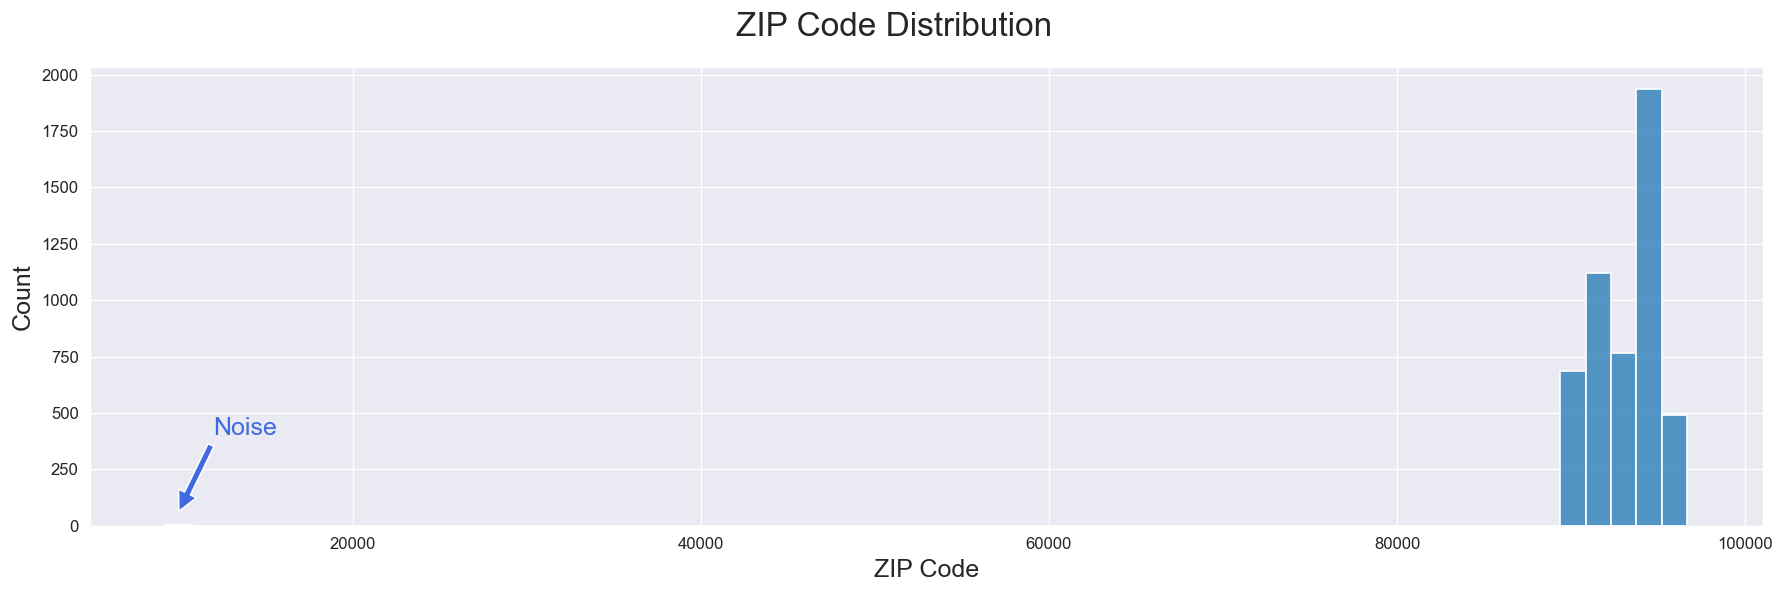

In [18]:
# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='ZIP Code', data=df, bins=60) #, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15, 
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('ZIP Code', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('ZIP Code Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [19]:
df[df['ZIP Code']<20000]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1

In [20]:
#Clean outliers
df.drop(df[df['ZIP Code']<20000].index, inplace=True)
df.reset_index(drop=True, inplace =True)

In [21]:
df.shape

(4999, 14)

#### Correct Invalid values of Experience 

In [22]:
df['Experience'].value_counts().sort_index()

-3       4
-2      15
-1      33
 0      66
 1      74
 2      85
 3     129
 4     113
 5     146
 6     119
 7     121
 8     119
 9     147
 10    118
 11    116
 12    102
 13    117
 14    127
 15    119
 16    127
 17    125
 18    137
 19    135
 20    148
 21    113
 22    124
 23    144
 24    131
 25    141
 26    134
 27    125
 28    138
 29    124
 30    126
 31    104
 32    154
 33    117
 34    125
 35    143
 36    114
 37    116
 38     88
 39     85
 40     57
 41     43
 42      8
 43      3
Name: Experience, dtype: int64

In [23]:
# change minus year (-3,-2,-1)to the absolute year 
df['Experience'] = df['Experience'].apply(abs)

In [24]:
# drop column ID and high correlated column Experience (to Age 99%)
df.drop('ID', axis=1, inplace=True) 
df.drop('Experience', axis=1, inplace=True) 

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Feature Transformation</p>

In [25]:
#Income is yearly and CCAvg is monthly, to be correspond transform CCAvg to yearly by multiplying 12
df['CCAvg'] = df['CCAvg']*12

In [26]:
# Categorizing the ZIP Code column into bins of 1,000 from 90,000 to 97,000
bins = range(90000, 98000, 1000)
labels = [f'{i}-{i+999}' for i in bins[:-1]]
df['ZIP_Code_Category'] = pd.cut(df['ZIP Code'], bins=bins, labels=labels, right=False)

# Creating a new feature 'ZIP_cat' with values '01' to '07' to represent each ZIP Code category
df['ZIP_cat'] = df['ZIP_Code_Category'].cat.codes.apply(lambda x: f'0{x+1}')

In [27]:
df

Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25      49     91107       4   19.2          1         0   
1      45      34     90089       3   18.0          1         0   
2      39      11     94720       1   12.0          1         0   
3      35     100     94112       1   32.4          2         0   
4      35      45     91330       4   12.0          2         0   
...   ...     ...       ...     ...    ...        ...       ...   
4994   29      40     92697       1   22.8          3         0   
4995   30      15     92037       4    4.8          1        85   
4996   63      24     93023       2    3.6          3         0   
4997   65      49     90034       3    6.0          2         0   
4998   28      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4994              0                   0           0       1           0   
4995              0                   0           0       1           0   
4996              0                   0           0       0           0   
4997              0                   0           0       1           0   
4998              0                   0           0       1           1   

     ZIP_Code_Category ZIP_cat  
0          91000-91999      02  
1          90000-90999      01  
2          94000-94999      05  
3          94000-94999      05  
4          91000-91999      02  
...                ...     ...  
4994       92000-92999      03  
4995       92000-92999      03  
4996       93000-93999      04  
4997       90000-90999      01  
4998       92000-92999      03  

[4999 rows x 14 columns]

In [28]:
df.drop('ZIP Code', axis=1, inplace=True) 
df.drop('ZIP_Code_Category', axis=1, inplace=True) 

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Categorical and Numerical Features Analysis</p>

Considering each individual variable affects the Target Variable, let's examine the variables

First, we will identify the relationship between the Target Variable and the Categorical Features. Then we will look at the mean and distribution of Numerical Features compared to the Target Variable.


<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Categorical Features vs Target Feature</p>

In [29]:
# categorical features in the dataset 
Cat_Features = ['CD Account','Education','Family','Securities Account','Online','ZIP_cat','CreditCard']

# target name in a variable for simplicity
Target = 'Personal Loan'

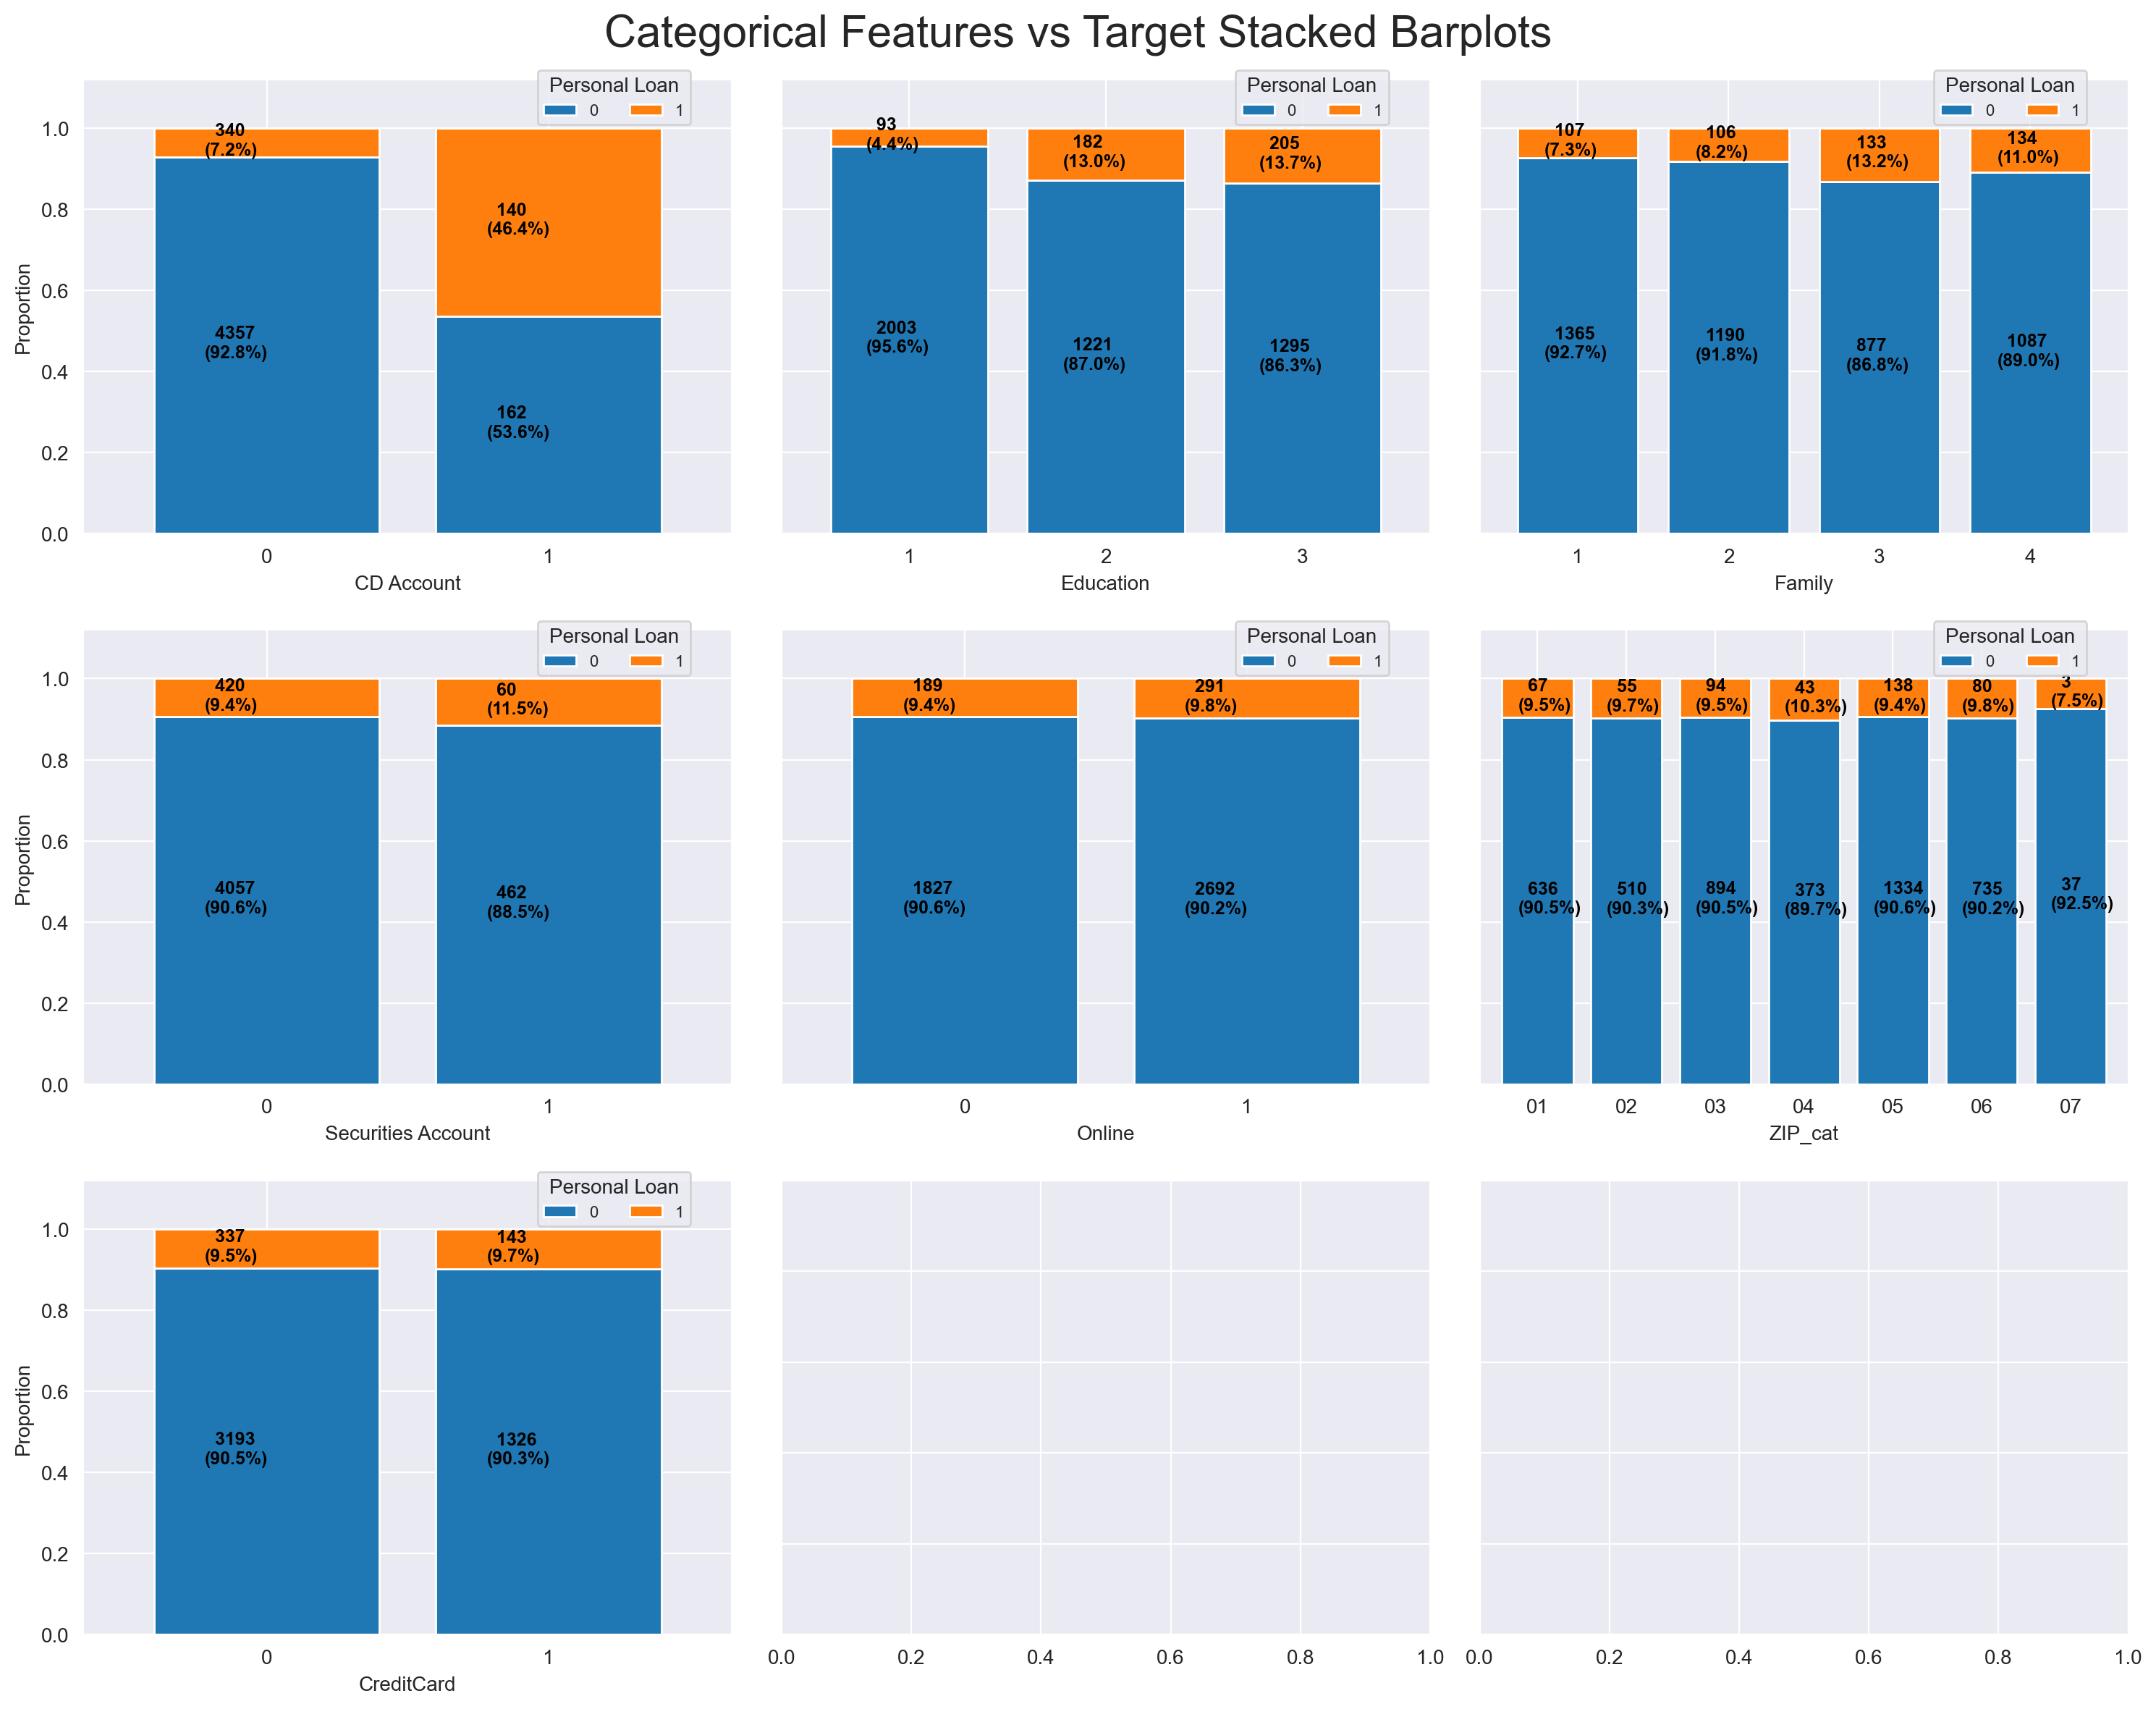

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12), dpi=200)

for i,col in enumerate(Cat_Features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])
    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, 
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Personal Loan', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
            

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

- Customers have CD account has more propablity to have personal loan, More bigger values in Family, Education have more propablity to have personal loan 
- As correlation matrix shows 'online', 'credit card' does not affect the target much and seems not important
- ZIP_cat plot shows almost not significant the a1 and a7 different may because of different points 

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Numerical Features vs Target</p>

In [31]:
# Define a list containing the names of important numerical features in the dataset 
Num_Features = ['CCAvg','Income','Mortgage','Age']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


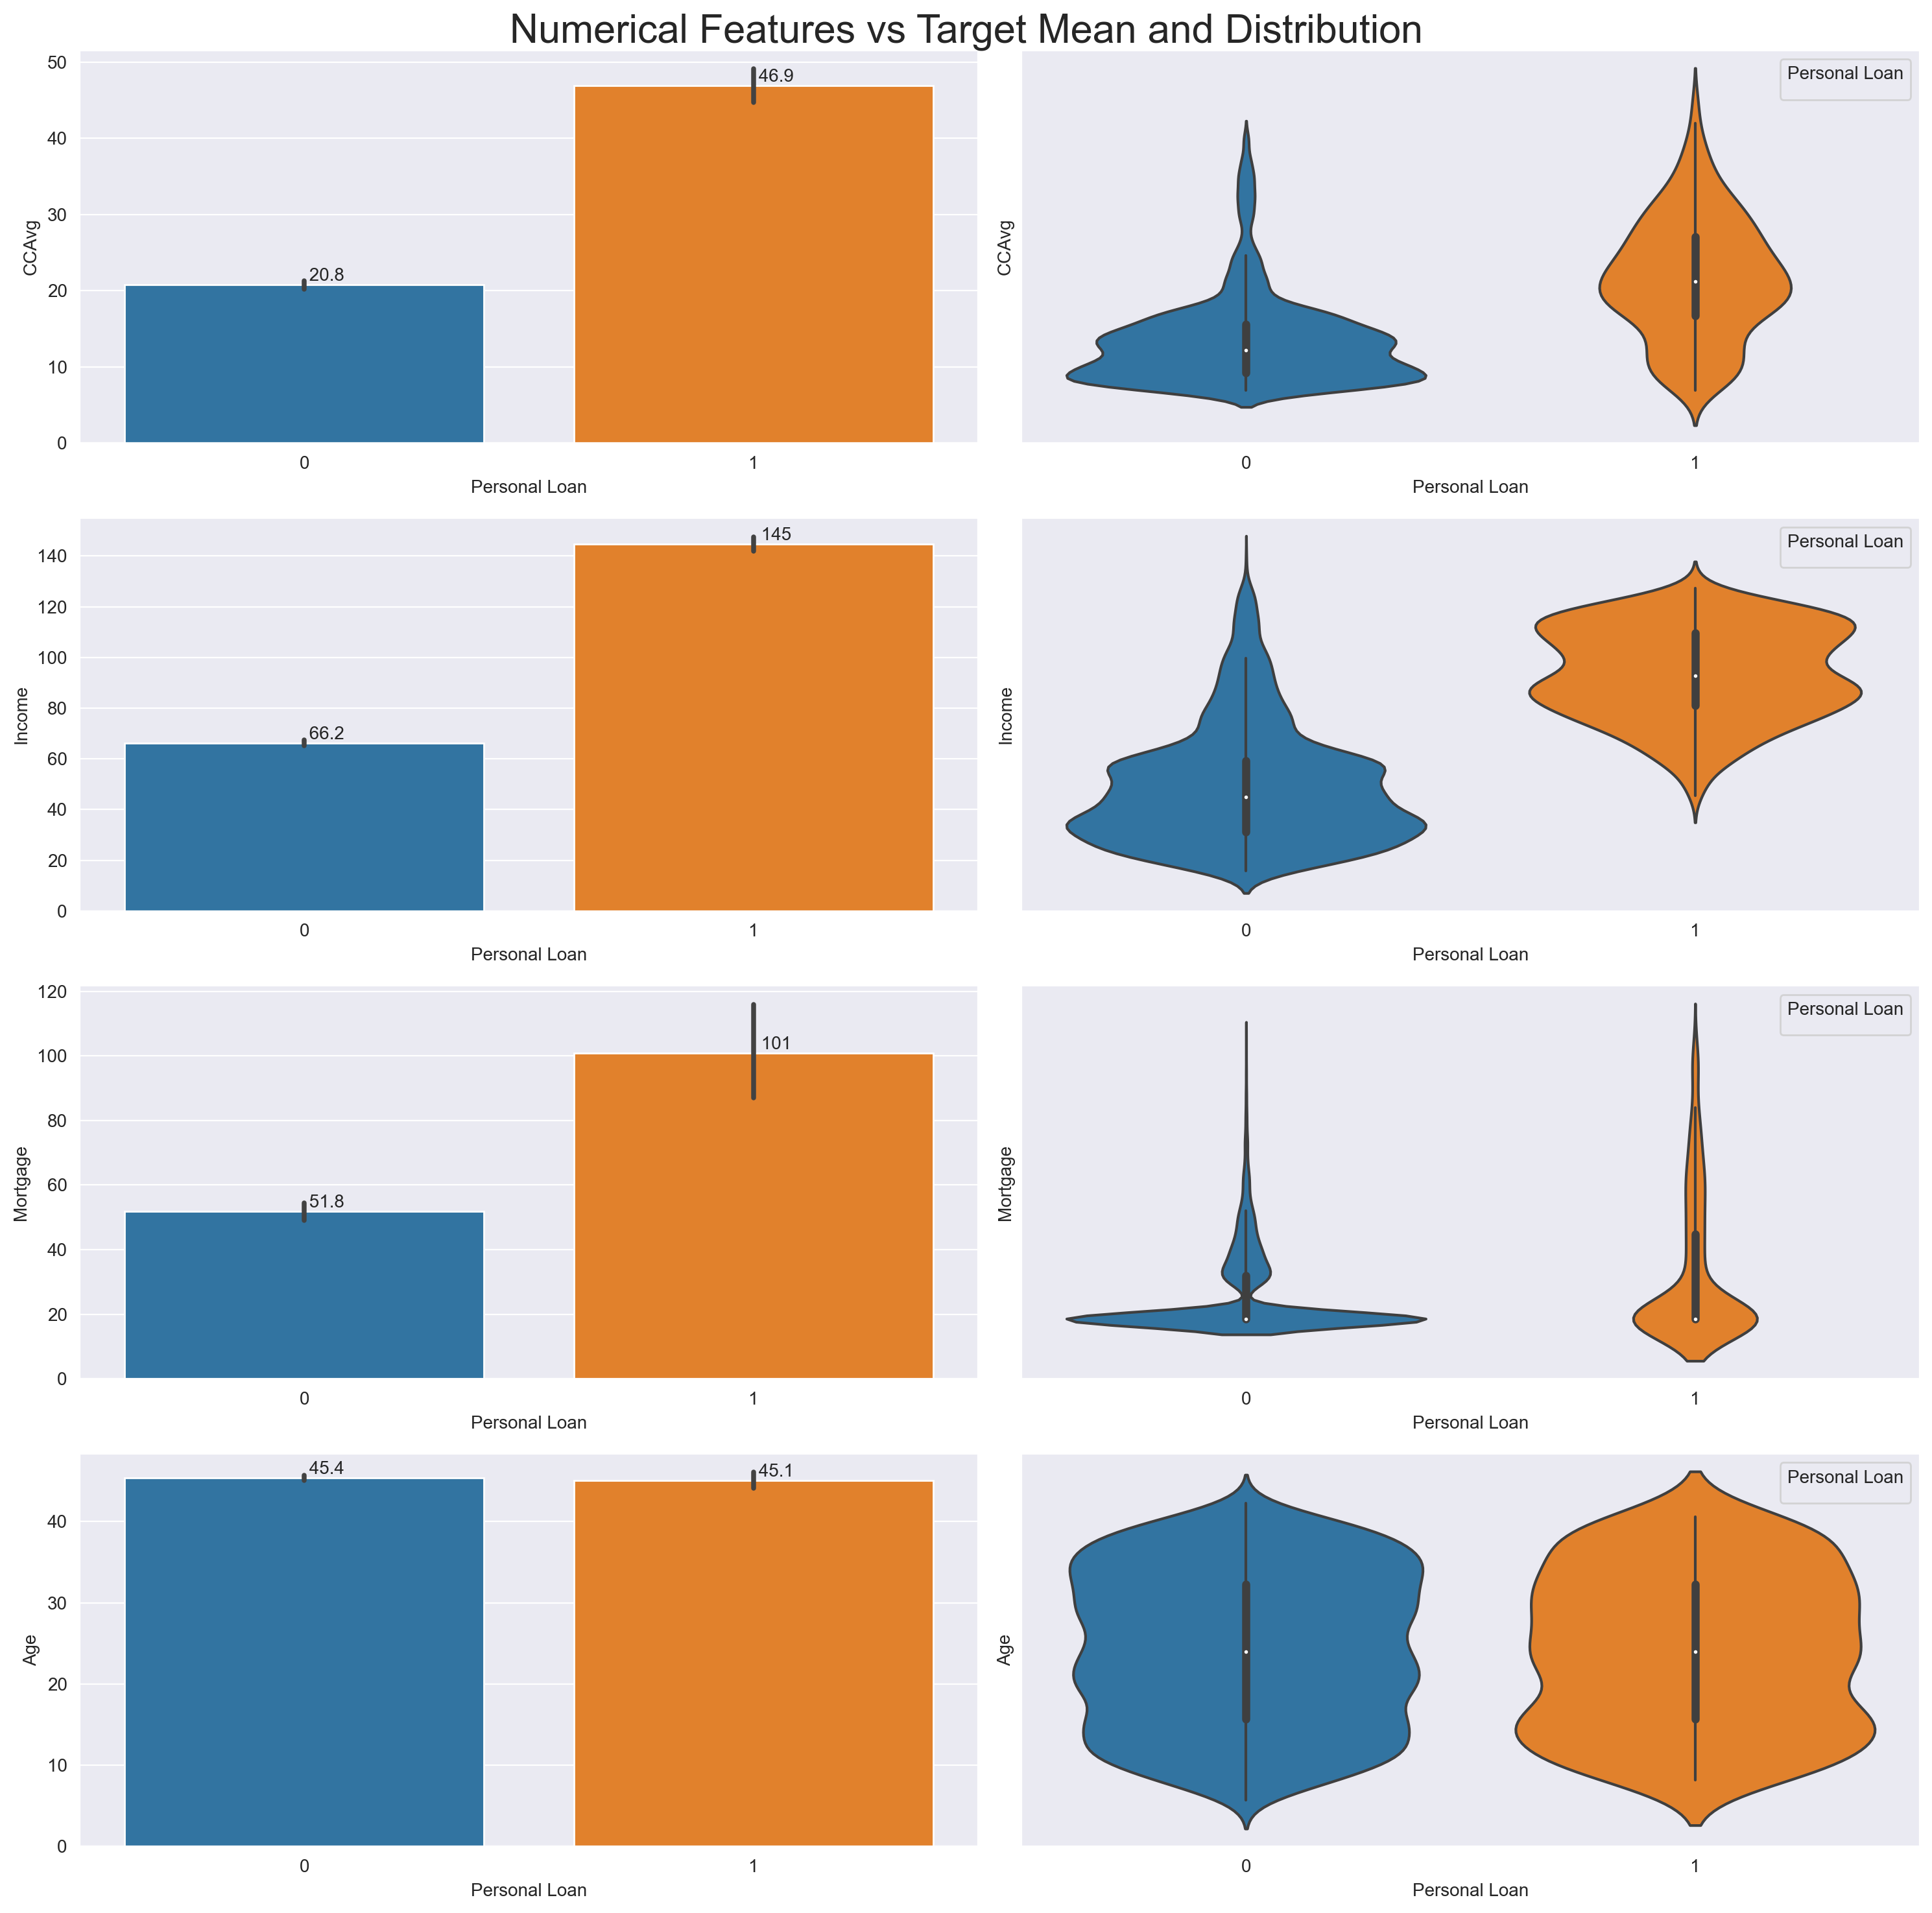

In [32]:

fig, ax = plt.subplots(4, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 1]})
for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
#     graph = sns.scatterplot(data=df, x=Target, y=col, ax=ax[i,0])
#     ax[i,0].legend(title='Personal Loan', loc='upper right')
    # violin Plot
    sns.violinplot(data=df, x=Target, y=col, ax=ax[i,1],label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Personal Loan', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Mean and Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Feature Selection Analysis</p>

In [33]:
#### change features to category features  
cols_to_exclude = []
for col in Cat_Features:
    if df[col].nunique() < 60 and col not in cols_to_exclude:
        df[col] = df[col].astype('category')

In [34]:
df.dtypes

Age                      int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
ZIP_cat               category
dtype: object

In [35]:
# crosstab shows the distribution of different of value of lables across categories 
pd.crosstab(df['Education'], df['Personal Loan'])


Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1295  205

In [36]:
# crosstab shows the ratio/probability of different of value of lables across categories 
df.groupby('Education')[['Personal Loan']].mean()

Personal Loan
Education               
1               0.044370
2               0.129722
3               0.136667

In [37]:
df.groupby('Family')[['Personal Loan']].mean() #count

Personal Loan
Family               
1            0.072690
2            0.081790
3            0.131683
4            0.109746

In [38]:
df.groupby('CD Account')[['Personal Loan']].mean()

Personal Loan
CD Account               
0                0.072387
1                0.463576

In [39]:
df[df['CD Account']=='1']['Personal Loan'].mean()

nan

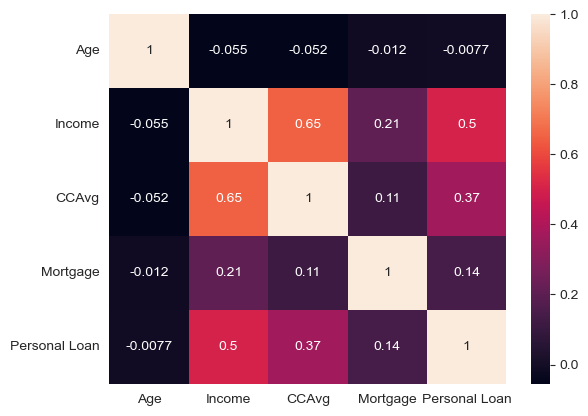

In [40]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

In [41]:
df.corr(numeric_only=True)

Age    Income     CCAvg  Mortgage  Personal Loan
Age            1.000000 -0.055164 -0.051959 -0.012484      -0.007694
Income        -0.055164  1.000000  0.645940  0.206712       0.502459
CCAvg         -0.051959  0.645940  1.000000  0.109834       0.366866
Mortgage      -0.012484  0.206712  0.109834  1.000000       0.142065
Personal Loan -0.007694  0.502459  0.366866  0.142065       1.000000

- Age, Credit Card, online, ZIP_cat are supposed to be dropped based on the feature analysis 

#### Visualize Important features regarding to the label feature

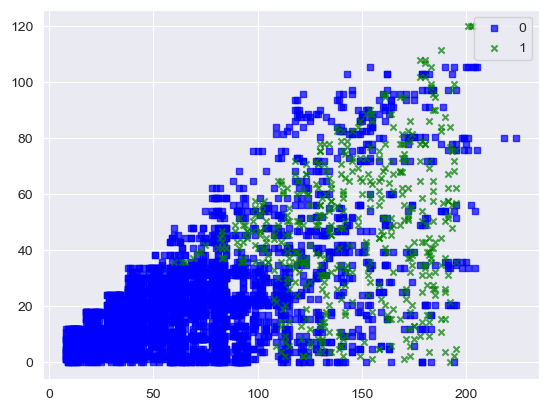

In [42]:
category_scatter(x='Income', y='CCAvg', label_col='Personal Loan', data=df);

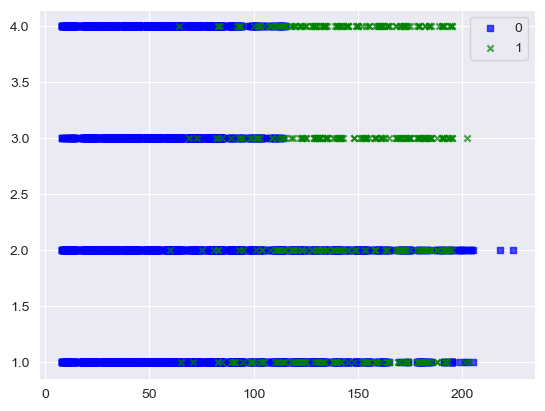

In [43]:
category_scatter(x='Income', y='Family', label_col='Personal Loan', data=df);

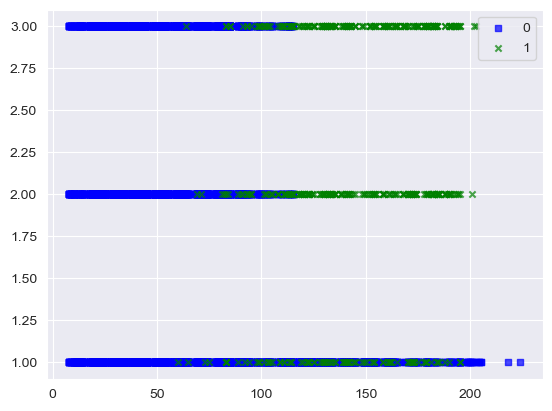

In [44]:
category_scatter(x='Income', y='Education', label_col='Personal Loan', data=df);

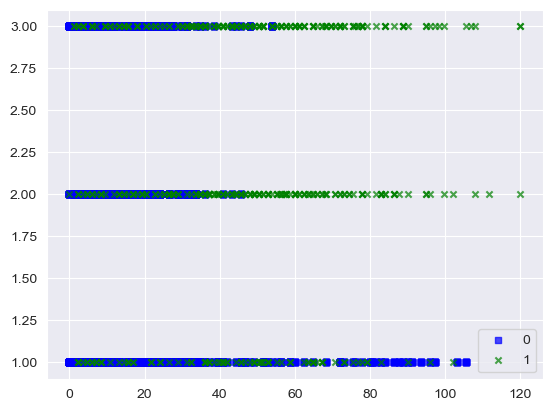

In [45]:
category_scatter(x='CCAvg', y='Education', label_col='Personal Loan', data=df);

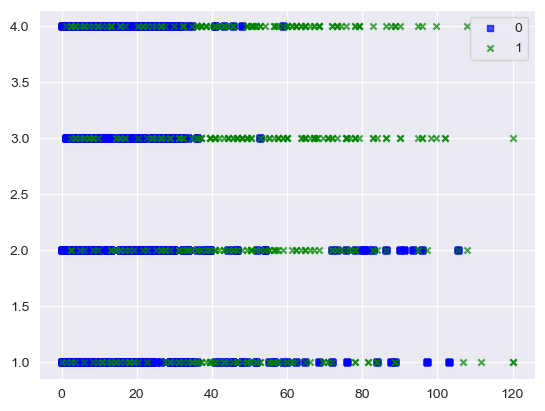

In [46]:
category_scatter(x='CCAvg', y='Family', label_col='Personal Loan', data=df);

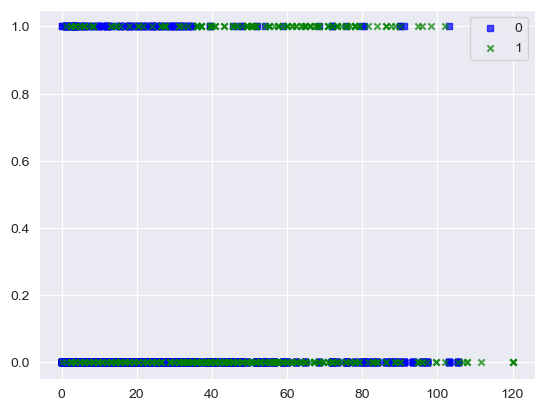

In [47]:
category_scatter(x='CCAvg', y='CD Account', label_col='Personal Loan', data=df);

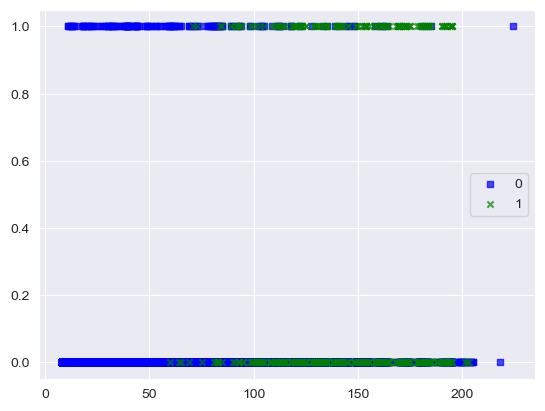

In [48]:
category_scatter(x='Income', y='CD Account', label_col='Personal Loan', data=df);

- The feature Income, CCAvg, Education, Family are most helpful to saperate the target features and seems important 
- Other features seem not so important but may need study to drop off
- So we do machine learning and feature selection 

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Machine Learning with training and feature selection</p> 

- Split the data into a train, test with a ratio of 67:33 and random_state 42
- Train a Baseline model: Decision Tree Model and Try Random Forest Model, KNN, 
- Feature selection based on the feature importance
- One hot encoding 
- Use SMOTE oversampling technique to treat the imbalanced dataset
- Get the Result Report and evaluate the result 
- How can we improve our model?
    - Try removing some features (feature selection)
    - Try using a different algorithm (ex. DecisionTreeRegressor)
    - Try tuning the hyperparameters
 - Evaluate the model 

In [112]:
# Define X and y for 
# features_to_exclude = ['Personal Loan', 'CreditCard', 'ZIP_cat', 'Online']

X = df.drop('Personal Loan', axis=1)  # DataFrame without the target feature
y = df['Personal Loan']


In [113]:
X

Age  Income Family  CCAvg Education  Mortgage Securities Account  \
0      25      49      4   19.2         1         0                  1   
1      45      34      3   18.0         1         0                  1   
2      39      11      1   12.0         1         0                  0   
3      35     100      1   32.4         2         0                  0   
4      35      45      4   12.0         2         0                  0   
...   ...     ...    ...    ...       ...       ...                ...   
4994   29      40      1   22.8         3         0                  0   
4995   30      15      4    4.8         1        85                  0   
4996   63      24      2    3.6         3         0                  0   
4997   65      49      3    6.0         2         0                  0   
4998   28      83      3    9.6         1         0                  0   

     CD Account Online CreditCard ZIP_cat  
0             0      0          0      02  
1             0      0          0      01  
2             0      0          0      05  
3             0      0          0      05  
4             0      0          1      02  
...         ...    ...        ...     ...  
4994          0      1          0      03  
4995          0      1          0      03  
4996          0      0          0      04  
4997          0      1          0      01  
4998          0      1          1      03  

[4999 rows x 11 columns]

In [114]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
###################tune train and test data set 
# train test split tunning 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

In [115]:
X_train

Age  Income Family  CCAvg Education  Mortgage Securities Account  \
1556   51      41      4   21.6         1         0                  0   
1003   53      65      4   24.0         3         0                  0   
382    65     133      4   24.0         1         0                  0   
941    55      30      4    8.4         2         0                  0   
4811   29     184      4   26.4         3       612                  0   
...   ...     ...    ...    ...       ...       ...                ...   
4426   31      18      1    4.8         3         0                  0   
466    45      39      1   28.8         1         0                  0   
3092   29      34      4    4.8         2         0                  0   
3772   62      83      4   28.8         3         0                  1   
860    60      28      1   18.0         3       124                  1   

     CD Account Online CreditCard ZIP_cat  
1556          0      0          0      05  
1003          0      1          0      06  
382           0      0          1      05  
941           0      0          1      02  
4811          0      1          0      03  
...         ...    ...        ...     ...  
4426          0      0          0      02  
466           0      0          1      01  
3092          0      0          1      01  
3772          0      0          0      04  
860           0      1          0      03  

[3349 rows x 11 columns]

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Build the Baseline Models for Decision Tree - KNN - Logistic Regression and find important features</p> 

In [116]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

In [117]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

    
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df       

In [118]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

In [119]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    '''clf
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses 
    GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects  
    the combination with the highest f1-score. The function returns the best classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Decision Tree and important features</p> 

In [120]:
# # Initialize the DT classifier
# # dt = DecisionTreeClassifier(max_depth=15, min_samples_split=1, random_state=42)

# # Define hyperparameters grid to search
# param_grid = {'max_depth': np.arange(2, 30), 'min_samples_split': np.arange(1, 5), 'random_state': np.arange(41, 42)}
# # Create a DT classifier object
# # Initialize the DT classifier
# dt = DecisionTreeClassifier()

# # Find the best classifier with the optimal hyperparameters
# dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)


In [121]:
# y_pred_train = dt_opt.predict(X_train)
# y_pred = dt_opt.predict(X_test)
# print('dt')
# print(classification_report(y_test, y_pred))

In [122]:
# one hot encoding
X = pd.get_dummies(X, drop_first=True)

In [123]:
# oversampling 
#SMOTE oversampling

ros = RandomOverSampler()
#ros = RandomUnderSampler()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [124]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=1, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred = dt.predict(X_test)
print('Classification Report for')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification Report for
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1493
           1       0.63      0.95      0.76       157

    accuracy                           0.94      1650
   macro avg       0.81      0.95      0.86      1650
weighted avg       0.96      0.94      0.95      1650

[[1406   87]
 [   8  149]]


#### Since the objective of this problem is to find out the target label as 1,  Rather than the accuracy, the recall of 1 predict how accurate in predicting 1. The confusion matrix shows the FN is 8 which is supposed to be as little as possibile.  

In [125]:
# decision tree regressor allows us to see 'the feature importances'
# pd.Series(dt.feature_importances_, index=X_train_resampled.columns).sort_values().plot(kind='bar');

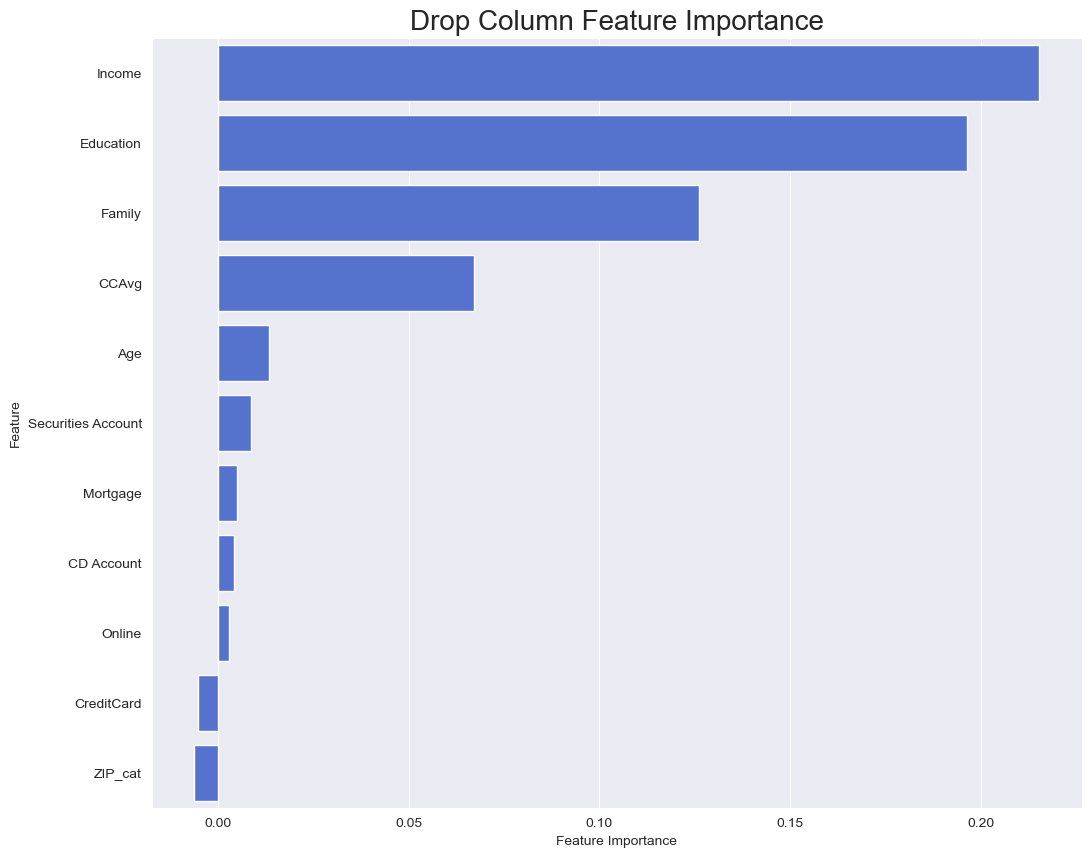

In [126]:
# Call drop_column_importance_plot
drop_column_importance_plot(dt, X_train, y_train)

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Apply the feature selection and tuning for the best parameter for DT </p> 

In [141]:
# Define X and y for 
features_to_exclude =['Personal Loan', 'CreditCard', 'ZIP_cat', 'Online','CD Account', 'Securities Account','Age','Mortgage'] # ['Personal Loan']#
X = df.drop(columns=features_to_exclude) #df.drop('Personal Loan', axis=1)  # DataFrame without the target feature

#X = df.drop('Personal Loan', axis=1) 
y = df['Personal Loan']

In [142]:
X

Income Family  CCAvg Education
0         49      4   19.2         1
1         34      3   18.0         1
2         11      1   12.0         1
3        100      1   32.4         2
4         45      4   12.0         2
...      ...    ...    ...       ...
4994      40      1   22.8         3
4995      15      4    4.8         1
4996      24      2    3.6         3
4997      49      3    6.0         2
4998      83      3    9.6         1

[4999 rows x 4 columns]

In [143]:
# one hot encoding
X = pd.get_dummies(X, drop_first=True)

In [144]:
X

Income  CCAvg  Family_2  Family_3  Family_4  Education_2  Education_3
0         49   19.2         0         0         1            0            0
1         34   18.0         0         1         0            0            0
2         11   12.0         0         0         0            0            0
3        100   32.4         0         0         0            1            0
4         45   12.0         0         0         1            1            0
...      ...    ...       ...       ...       ...          ...          ...
4994      40   22.8         0         0         0            0            1
4995      15    4.8         0         0         1            0            0
4996      24    3.6         1         0         0            0            1
4997      49    6.0         0         1         0            1            0
4998      83    9.6         0         1         0            0            0

[4999 rows x 7 columns]

In [145]:
# train test split (Try different splits to train the models)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
###################tune train and test data set 
# train test split tunning 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

In [146]:
X_train

Income  CCAvg  Family_2  Family_3  Family_4  Education_2  Education_3
1556      41   21.6         0         0         1            0            0
1003      65   24.0         0         0         1            0            1
382      133   24.0         0         0         1            0            0
941       30    8.4         0         0         1            1            0
4811     184   26.4         0         0         1            0            1
...      ...    ...       ...       ...       ...          ...          ...
4426      18    4.8         0         0         0            0            1
466       39   28.8         0         0         0            0            0
3092      34    4.8         0         0         1            1            0
3772      83   28.8         0         0         1            0            1
860       28   18.0         0         0         0            0            1

[3349 rows x 7 columns]

In [147]:
X_train

Income  CCAvg  Family_2  Family_3  Family_4  Education_2  Education_3
1556      41   21.6         0         0         1            0            0
1003      65   24.0         0         0         1            0            1
382      133   24.0         0         0         1            0            0
941       30    8.4         0         0         1            1            0
4811     184   26.4         0         0         1            0            1
...      ...    ...       ...       ...       ...          ...          ...
4426      18    4.8         0         0         0            0            1
466       39   28.8         0         0         0            0            0
3092      34    4.8         0         0         1            1            0
3772      83   28.8         0         0         1            0            1
860       28   18.0         0         0         0            0            1

[3349 rows x 7 columns]

In [148]:
# oversampling 
#SMOTE oversampling

ros = RandomOverSampler()
#ros = RandomUnderSampler()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [149]:
X_train_resampled

Income  CCAvg  Family_2  Family_3  Family_4  Education_2  Education_3
0         41   21.6         0         0         1            0            0
1         65   24.0         0         0         1            0            1
2        133   24.0         0         0         1            0            0
3         30    8.4         0         0         1            1            0
4        184   26.4         0         0         1            0            1
...      ...    ...       ...       ...       ...          ...          ...
6047     122   36.0         0         0         0            0            1
6048     164   88.8         0         0         1            0            1
6049     131   58.8         0         0         0            0            1
6050     131   14.4         1         0         0            0            1
6051     170    1.2         0         0         0            0            1

[6052 rows x 7 columns]

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Build the Baseline Model - DT</p> 

In [150]:
# Discion Tree Classifier

model = DecisionTreeClassifier(max_depth=3, min_samples_split=1, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1493
           1       0.61      0.76      0.68       157

    accuracy                           0.93      1650
   macro avg       0.79      0.85      0.82      1650
weighted avg       0.94      0.93      0.93      1650



In [151]:
confusion_matrix(y_test, y_pred)

array([[1417,   76],
       [  38,  119]], dtype=int64)

#### After appling the feature selection the recall, accuracy drops and FN increase. It seems the feature selection is not so suitable in this dataset.  

#### Tuning the DT parameters 

In [152]:
# Initialize the DT classifier
# dt = DecisionTreeClassifier(max_depth=15, min_samples_split=1, random_state=42)

# Define hyperparameters grid to search
param_grid = {'max_depth': np.arange(2, 30), 'min_samples_split': np.arange(1, 5), 'random_state': np.arange(41,43)}
# Create a DT classifier object
# Initialize the DT classifier
dt = DecisionTreeClassifier()

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train_resampled, y_train_resampled)

Best hyperparameters:
 {'max_depth': 14, 'min_samples_split': 1, 'random_state': 41}


In [153]:
y_pred_train = dt_opt.predict(X_train)
y_pred = dt_opt.predict(X_test)
print('dt')
print(classification_report(y_test, y_pred))

dt
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1493
           1       0.95      0.89      0.92       157

    accuracy                           0.99      1650
   macro avg       0.97      0.94      0.96      1650
weighted avg       0.99      0.99      0.99      1650



In [154]:
confusion_matrix(y_test, y_pred)

array([[1486,    7],
       [  17,  140]], dtype=int64)

#### After tunining the parameter, the reports and the confusion matrix show there is some improvement of the accuracy. 

### Conclusion: Although the accuracy changed from 94% to 98% after tuning parameter, the recall drops.  The feature selection seems not proper in this dataset

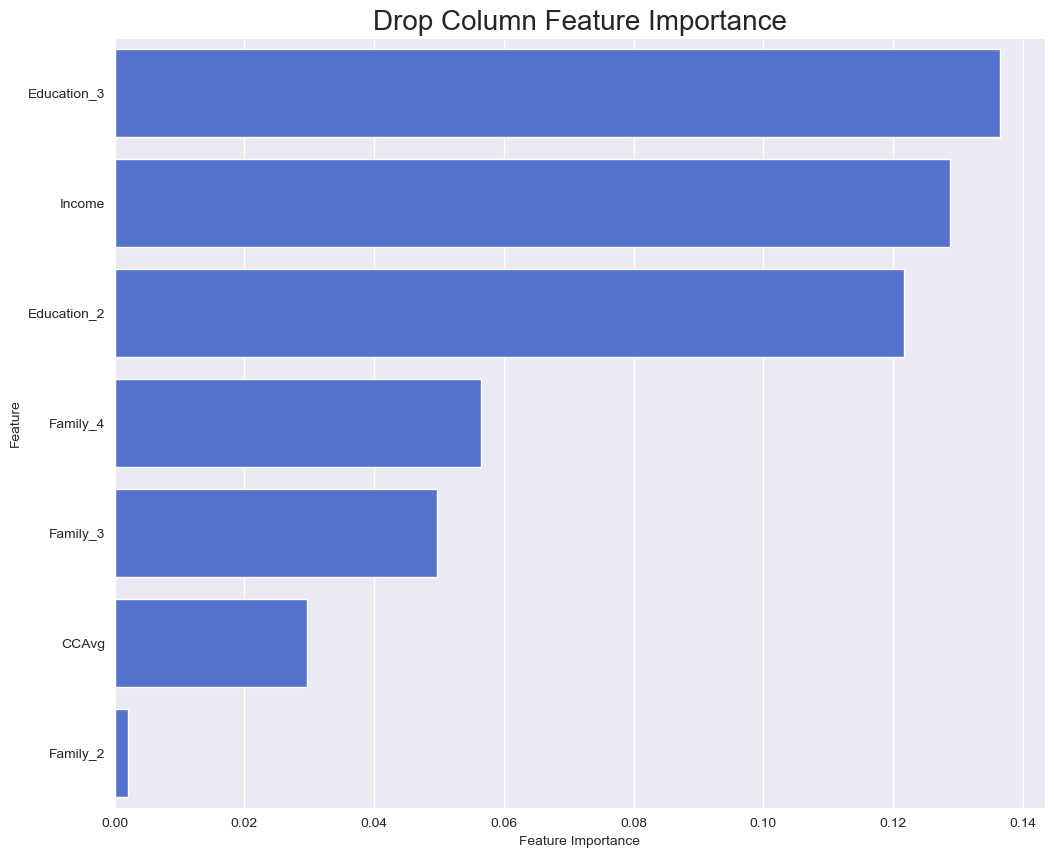

In [155]:
# Call drop_column_importance_plot
drop_column_importance_plot(dt_opt, X_train, y_train)

In [156]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

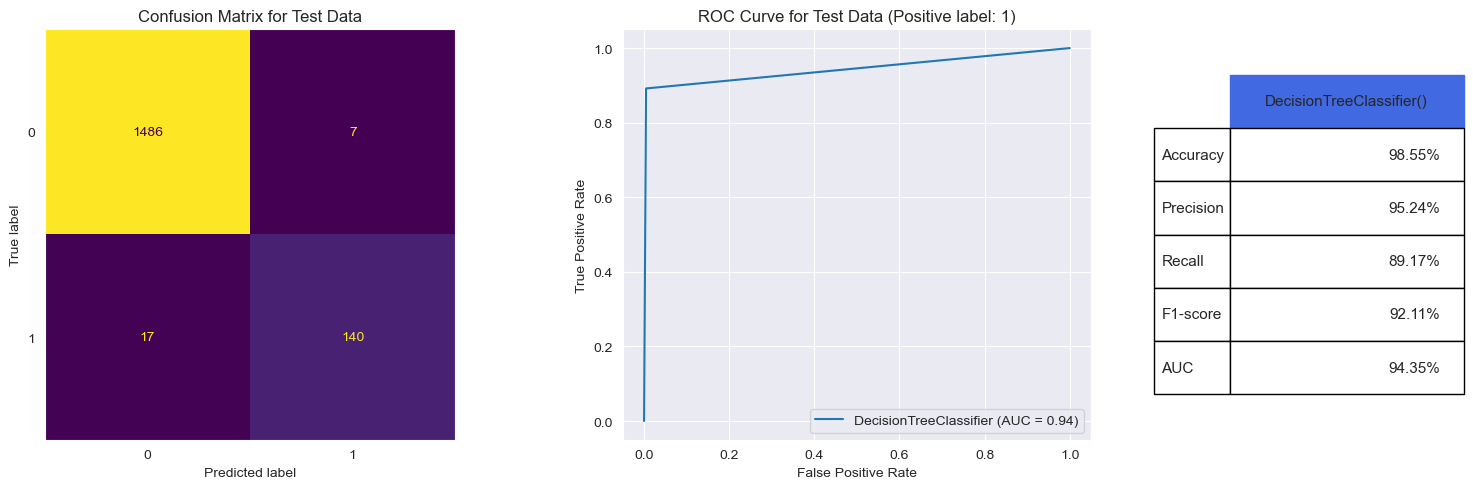

In [157]:
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(dt_opt, X_test, y_test, colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(dt_opt, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
     # Report results for the class specified by positive label
    result = metrics_calculator(dt_opt, X_test, y_test, dt)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(1, 3)
    table.set_fontsize(18)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()    

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:15px">KNN and important features</p> 

In [158]:
# # Define X and y for 

X = df.drop('Personal Loan', axis=1) 
y = df['Personal Loan']

In [159]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [160]:
X_train

Age  Income Family  CCAvg Education  Mortgage Securities Account  \
1556   51      41      4   21.6         1         0                  0   
1003   53      65      4   24.0         3         0                  0   
382    65     133      4   24.0         1         0                  0   
941    55      30      4    8.4         2         0                  0   
4811   29     184      4   26.4         3       612                  0   
...   ...     ...    ...    ...       ...       ...                ...   
4426   31      18      1    4.8         3         0                  0   
466    45      39      1   28.8         1         0                  0   
3092   29      34      4    4.8         2         0                  0   
3772   62      83      4   28.8         3         0                  1   
860    60      28      1   18.0         3       124                  1   

     CD Account Online CreditCard ZIP_cat  
1556          0      0          0      05  
1003          0      1          0      06  
382           0      0          1      05  
941           0      0          1      02  
4811          0      1          0      03  
...         ...    ...        ...     ...  
4426          0      0          0      02  
466           0      0          1      01  
3092          0      0          1      01  
3772          0      0          0      04  
860           0      1          0      03  

[3349 rows x 11 columns]

In [161]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [163]:
# oversampling 
#SMOTE oversampling

ros = RandomOverSampler()
#ros = RandomUnderSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

In [164]:
# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


In [165]:
y_pred_train = knn_opt.predict(X_train)
y_pred = knn_opt.predict(X_test)
print('knn')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

knn
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1493
           1       0.90      0.64      0.75       157

    accuracy                           0.96      1650
   macro avg       0.93      0.82      0.86      1650
weighted avg       0.96      0.96      0.96      1650

[[1482   11]
 [  56  101]]


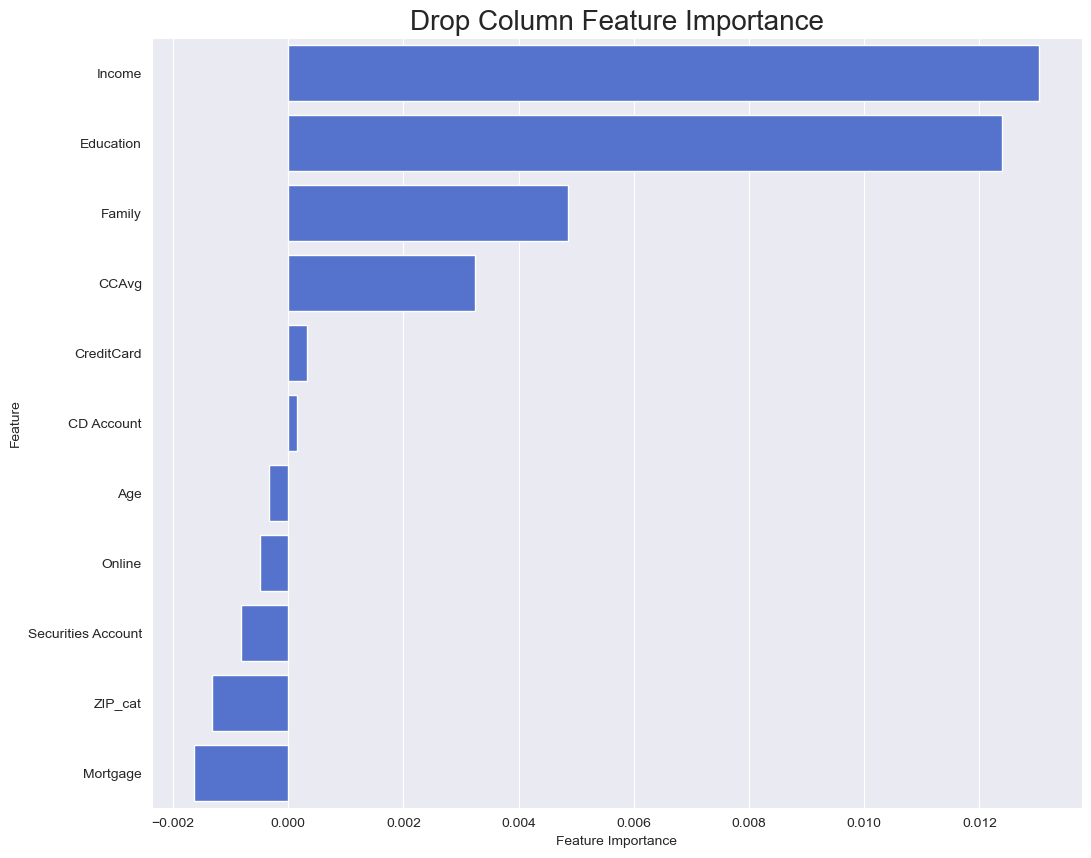

In [167]:
# Call drop_column_importance_plot
drop_column_importance_plot(knn_opt, X_train, y_train)

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Apply the feature selection and tuning for the best parameter for KNN </p> 

In [176]:
# # Define X and y for selected features
# features_to_exclude =['Personal Loan', 'ZIP_cat', 'Online', 'Securities Account','Age','Mortgage'] # ['Personal Loan']#
features_to_exclude =['Personal Loan', 'CreditCard', 'ZIP_cat', 'Online','CD Account', 'Securities Account','Age','Mortgage'] # ['Personal Loan']#
X = df.drop(columns=features_to_exclude) #df.drop('Personal Loan', axis=1)  # DataFrame without the target feature

# X = df.drop('Personal Loan', axis=1) 
y = df['Personal Loan']

In [177]:
X

Income Family  CCAvg Education
0         49      4   19.2         1
1         34      3   18.0         1
2         11      1   12.0         1
3        100      1   32.4         2
4         45      4   12.0         2
...      ...    ...    ...       ...
4994      40      1   22.8         3
4995      15      4    4.8         1
4996      24      2    3.6         3
4997      49      3    6.0         2
4998      83      3    9.6         1

[4999 rows x 4 columns]

In [178]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train


Income Family  CCAvg Education
1556      41      4   21.6         1
1003      65      4   24.0         3
382      133      4   24.0         1
941       30      4    8.4         2
4811     184      4   26.4         3
...      ...    ...    ...       ...
4426      18      1    4.8         3
466       39      1   28.8         1
3092      34      4    4.8         2
3772      83      4   28.8         3
860       28      1   18.0         3

[3349 rows x 4 columns]

In [179]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [180]:
# oversampling 
#SMOTE oversampling

ros = RandomOverSampler()
#ros = RandomUnderSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

In [182]:
X_train

Income    Family     CCAvg  Education
0    -0.714551  1.422952 -0.085928  -1.049682
1    -0.196714  1.422952  0.027465   1.331209
2     1.270490  1.422952  0.027465  -1.049682
3    -0.951893  1.422952 -0.709593   0.140763
4     2.370893  1.422952  0.140859   1.331209
...        ...       ...       ...        ...
6047  1.227337 -0.327449 -0.709593   0.140763
6048  0.407429  1.422952  0.934614   1.331209
6049  1.011571 -0.327449 -0.482806   1.331209
6050  0.860536  0.547752  0.764524   1.331209
6051  1.097878  1.422952 -0.822987   1.331209

[6052 rows x 4 columns]

In [183]:
# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)


Best hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


In [184]:
y_pred_train = knn_opt.predict(X_train)
y_pred = knn_opt.predict(X_test)
print('knn')
print(classification_report(y_test, y_pred))

knn
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1493
           1       0.99      0.85      0.91       157

    accuracy                           0.98      1650
   macro avg       0.98      0.92      0.95      1650
weighted avg       0.98      0.98      0.98      1650



In [185]:
confusion_matrix(y_test, y_pred)

array([[1491,    2],
       [  24,  133]], dtype=int64)

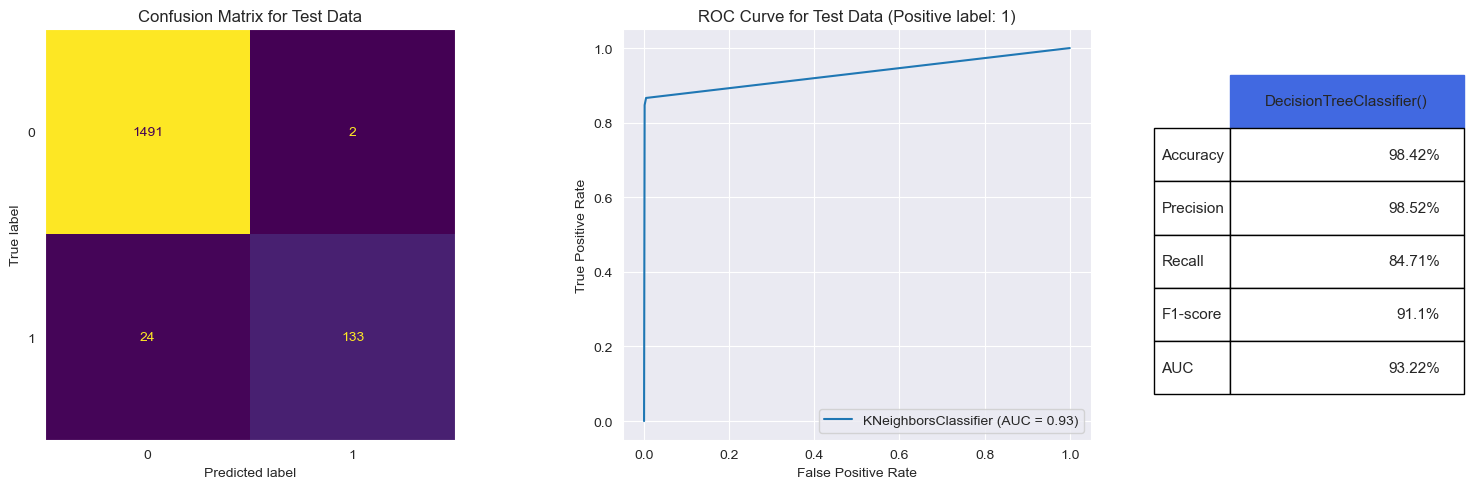

In [186]:
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(knn_opt, X_test, y_test, colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(knn_opt, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
     # Report results for the class specified by positive label
    result = metrics_calculator(knn_opt, X_test, y_test, dt)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(1, 3)
    table.set_fontsize(18)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()    

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Logistic Regression and important features</p> 

In [204]:
# Define X and y for 
# features_to_exclude = ['Personal Loan', 'CreditCard', 'ZIP_cat', 'Online']

X = df.drop('Personal Loan', axis=1)  # DataFrame without the target feature
y = df['Personal Loan']


In [205]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [206]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [207]:
# oversampling 
#SMOTE oversampling

ros = RandomOverSampler()
#ros = RandomUnderSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

In [208]:
X_train

Age    Income    Family     CCAvg  Education  Mortgage  \
0     0.483014 -0.714551  1.422952 -0.085928  -1.049682 -0.558935   
1     0.657447 -0.196714  1.422952  0.027465   1.331209 -0.558935   
2     1.704051  1.270490  1.422952  0.027465  -1.049682 -0.558935   
3     0.831881 -0.951893  1.422952 -0.709593   0.140763 -0.558935   
4    -1.435759  2.370893  1.422952  0.140859   1.331209  5.326676   
...        ...       ...       ...       ...        ...       ...   
6047 -0.127505  1.162607 -0.327449  0.736176   0.140763 -0.558935   
6048 -1.610193  1.313643  0.547752  0.424343   1.331209  3.759103   
6049  0.395797  1.853056  1.422952  1.331492   1.331209  3.384040   
6050 -1.086891  0.989995 -1.202649  0.707827   1.331209 -0.558935   
6051 -1.086891  0.989995 -1.202649  0.707827   1.331209 -0.558935   

      Securities Account  CD Account    Online  CreditCard   ZIP_cat  
0              -0.335045   -0.251346 -1.190819   -0.643177  0.692602  
1              -0.335045   -0.251346  0.839758   -0.643177  1.282661  
2              -0.335045   -0.251346 -1.190819    1.554782  0.692602  
3              -0.335045   -0.251346 -1.190819    1.554782 -1.077577  
4              -0.335045   -0.251346  0.839758   -0.643177 -0.487517  
...                  ...         ...       ...         ...       ...  
6047           -0.335045   -0.251346 -1.190819    1.554782  0.692602  
6048           -0.335045   -0.251346 -1.190819    1.554782  0.102542  
6049           -0.335045   -0.251346 -1.190819   -0.643177  0.102542  
6050           -0.335045   -0.251346  0.839758   -0.643177  0.692602  
6051           -0.335045   -0.251346  0.839758   -0.643177  0.692602  

[6052 rows x 11 columns]

In [209]:
logreg = LogisticRegression(max_iter=100)

# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]
# Define hyperparameters grid
param_grid = {'solver':['saga']}

# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters 
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)


Best hyperparameters:
 {'solver': 'saga'}


In [210]:
y_pred_train = logreg_opt.predict(X_train)
y_pred = logreg_opt.predict(X_test)
print('logisticR')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

logisticR
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1493
           1       0.47      0.83      0.60       157

    accuracy                           0.89      1650
   macro avg       0.72      0.86      0.77      1650
weighted avg       0.93      0.89      0.91      1650

[[1344  149]
 [  27  130]]


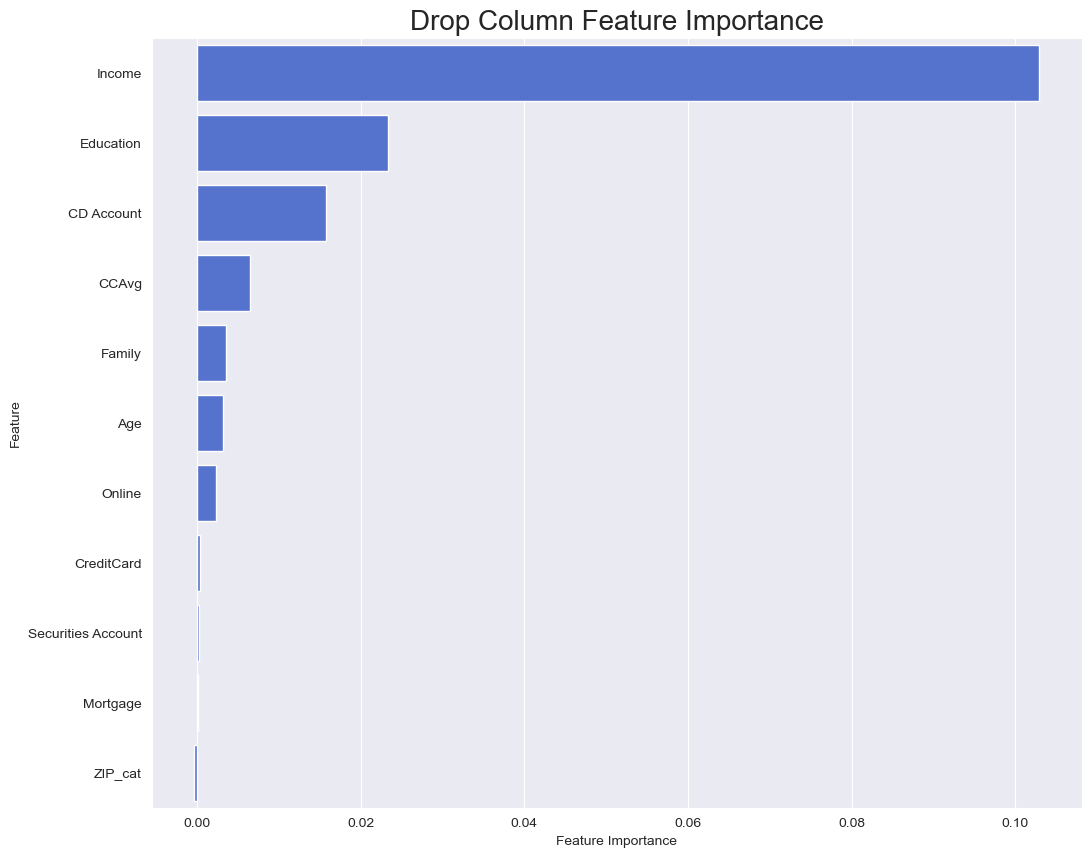

In [211]:
drop_column_importance_plot(logreg_opt, X_train, y_train)

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Apply the feature selection and tuning for the best parameter for Logistic Regression </p> 

In [219]:
# # Define X and y for selected features
#features_to_exclude =['Personal Loan', 'ZIP_cat', 'Online', 'Securities Account','Age','Mortgage','CCAvg'] # ['Personal Loan']
features_to_exclude =['Personal Loan', 'ZIP_cat', 'Online', 'Securities Account','Age','Mortgage','CreditCard'] # ['Personal Loan']#
X = df.drop(columns=features_to_exclude) #df.drop('Personal Loan', axis=1)  # DataFrame without the target feature

# X = df.drop('Personal Loan', axis=1) 
y = df['Personal Loan']

In [220]:
X

Income Family  CCAvg Education CD Account
0         49      4   19.2         1          0
1         34      3   18.0         1          0
2         11      1   12.0         1          0
3        100      1   32.4         2          0
4         45      4   12.0         2          0
...      ...    ...    ...       ...        ...
4994      40      1   22.8         3          0
4995      15      4    4.8         1          0
4996      24      2    3.6         3          0
4997      49      3    6.0         2          0
4998      83      3    9.6         1          0

[4999 rows x 5 columns]

In [221]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [222]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [223]:
# oversampling 
#SMOTE oversampling

ros = RandomOverSampler()
#ros = RandomUnderSampler()

(X_train, y_train) = ros.fit_resample(X_train, y_train)

In [224]:
X_train

Income    Family     CCAvg  Education  CD Account
0    -0.714551  1.422952 -0.085928  -1.049682   -0.251346
1    -0.196714  1.422952  0.027465   1.331209   -0.251346
2     1.270490  1.422952  0.027465  -1.049682   -0.251346
3    -0.951893  1.422952 -0.709593   0.140763   -0.251346
4     2.370893  1.422952  0.140859   1.331209   -0.251346
...        ...       ...       ...        ...         ...
6047  0.817383  1.422952  1.728370   0.140763   -0.251346
6048  1.658867  0.547752 -0.766290   0.140763   -0.251346
6049  2.543505 -1.202649 -1.106471   0.140763   -0.251346
6050  0.882112  1.422952  0.537737   0.140763   -0.251346
6051  1.615714 -0.327449 -0.993078   1.331209   -0.251346

[6052 rows x 5 columns]

In [225]:
logreg = LogisticRegression(max_iter=100)

# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]
# Define hyperparameters grid
# param_grid = {'solver':['saga']}

# # param_grid = {'solver':['saga'], 
# #                'penalty':['elasticnet'], 
# #                'C': np.logspace(-5, 5, 10),
# #                'l1_ratio': np.arange(0,1.1,0.1), 
# #                'class_weight':class_weights}


param_grid =  [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 
               'penalty':['none'], 
               'class_weight':class_weights}, 
              
              {'solver':['lbfgs', 'newton-cg', 'sag'], 
               'penalty':['l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['liblinear', 'saga'], 
               'penalty': ['l1', 'l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['saga'], 
               'penalty':['elasticnet'], 
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1), 
               'class_weight':class_weights}]    


# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters 
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)


Best hyperparameters:
 {'C': 0.021544346900318846, 'class_weight': {0: 0.4737368421052632, 1: 0.5262631578947368}, 'penalty': 'l1', 'solver': 'saga'}


In [226]:
y_pred_train = logreg_opt.predict(X_train)
y_pred = logreg_opt.predict(X_test)
print('logisticR')
print(classification_report(y_test, y_pred))

logisticR
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1493
           1       0.47      0.85      0.60       157

    accuracy                           0.89      1650
   macro avg       0.72      0.87      0.77      1650
weighted avg       0.93      0.89      0.91      1650



In [227]:
confusion_matrix(y_test, y_pred)

array([[1340,  153],
       [  24,  133]], dtype=int64)

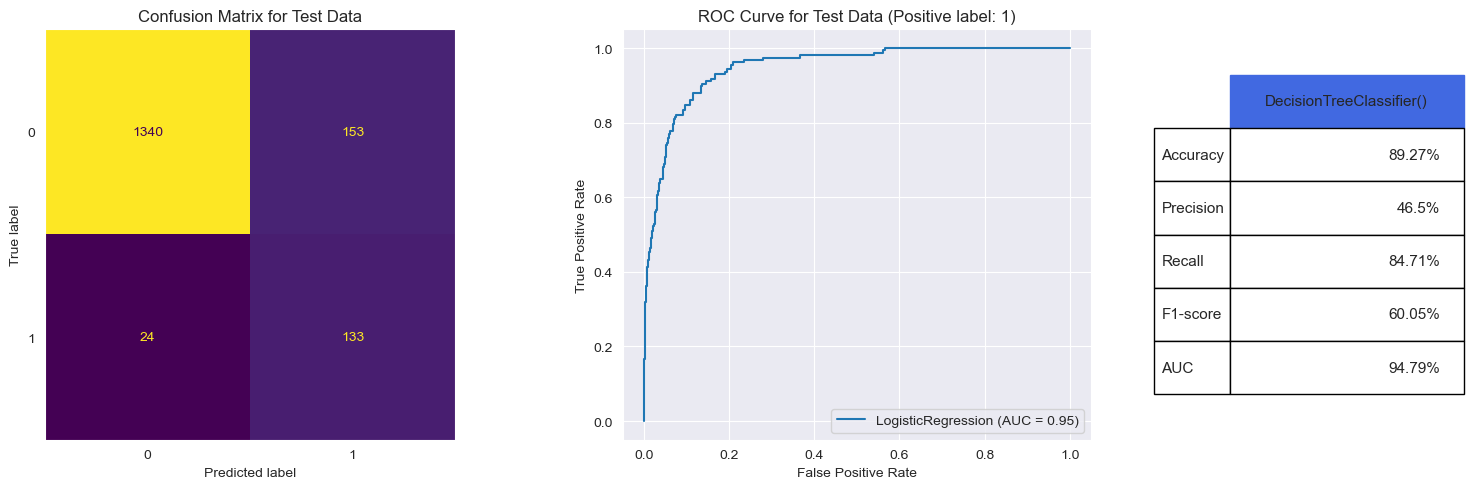

In [228]:
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(logreg_opt, X_test, y_test, colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(logreg_opt, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
     # Report results for the class specified by positive label
    result = metrics_calculator(logreg_opt, X_test, y_test, dt)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(1, 3)
    table.set_fontsize(18)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()    

In [392]:
# # automate using a for loop
# # GridSearch

# for i in [3,15,30]:
#     for j in [1,10,30]:
# #         print(i ,j)
#         model = DecisionTreeClassifier(max_depth=i, min_samples_split=j, random_state=42)
# #         model.fit(X_train, y_train)
#         model.fit(X_train_resampled, y_train_resampled)
#         y_pred = model.predict(X_test)

# #         dt.fit(X_train, y_train)
# #         y_pred = dt.predict(X_test)
#         print(classification_report(y_test, y_pred))
#         print(confusion_matrix(y_test, y_pred))

In [393]:
# # decision tree regressor allows us to see 'the feature importances'

# pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='bar');

In [394]:
#- The feature Income, CCAvg, Education, Family are most helpful to saperate the target features and seems important 

In [395]:
# # Find Important features with positive feature_importance value
# feature_importances = drop_column_importance(dt_opt, X_train, y_train, 0)
# selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature'] # Threshold value of 0.01


<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:15px">Deep Learning to classify the "Personal Loan" </p> 

### Model Validation (cross validation)
#### K-Fold Cross Validation
- [_____5 - FoldCV_________[Test]

#### Holdout cross validation (Better for Deep Learning
- [_---Train---|Val|Test]
- [3k|1k|1K

- Data sent is so big you don't need Cross Val

In [229]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [230]:
df.dtypes

Age                     int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
ZIP_cat                 int64
dtype: object

In [231]:
# Define X and y for 
# features_to_exclude = ['Personal Loan', 'CreditCard', 'ZIP_cat', 'Online']

X = df.drop('Personal Loan', axis=1)  # DataFrame without the target feature
y = df['Personal Loan']

In [232]:
# train test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
X_valid = X_train_full[:1000] # first 10000
X_train = X_train_full[1000:] # starting from 10001 to the end

y_valid = y_train_full[:1000] # don't have to normalize the y's
y_train = y_train_full[1000:]


#
X_test = X_test_full 
y_test = y_test_full 

In [234]:
y_test

84      0
2470    0
2804    1
4987    0
4924    0
       ..
4486    0
1918    0
4696    0
3360    0
3886    0
Name: Personal Loan, Length: 1000, dtype: int64

In [235]:
X_train

Age  Income  Family  CCAvg  Education  Mortgage  Securities Account  \
2591   57      69       4    8.4          1       245                   0   
4346   58      22       3    2.4          1         0                   0   
1928   44      30       1    7.2          3         0                   0   
1468   59      59       4   14.4          2         0                   0   
1224   30     118       2   33.6          2         0                   0   
...   ...     ...     ...    ...        ...       ...                 ...   
4426   31      18       1    4.8          3         0                   0   
466    45      39       1   28.8          1         0                   0   
3092   29      34       4    4.8          2         0                   0   
3772   62      83       4   28.8          3         0                   1   
860    60      28       1   18.0          3       124                   1   

      CD Account  Online  CreditCard  ZIP_cat  
2591           0       0           0        5  
4346           0       1           0        1  
1928           0       1           0        5  
1468           0       1           0        1  
1224           0       0           0        5  
...          ...     ...         ...      ...  
4426           0       0           0        2  
466            0       0           1        1  
3092           0       0           1        1  
3772           0       0           0        4  
860            0       1           0        3  

[2999 rows x 11 columns]

In [236]:
X_test

Age  Income  Family  CCAvg  Education  Mortgage  Securities Account  \
84     46      18       1   10.8          3         0                   0   
2470   36      44       2   13.2          2        85                   0   
2804   37     182       3   69.6          3         0                   0   
4987   34      85       1   30.0          1       136                   0   
4924   64      82       4   40.8          2         0                   0   
...   ...     ...     ...    ...        ...       ...                 ...   
4486   38      81       1   43.2          2         0                   0   
1918   38      19       2   16.8          2       120                   0   
4696   49     103       3   24.0          2       167                   0   
3360   31      85       3   19.2          1        87                   0   
3886   24     118       2   86.4          1         0                   1   

      CD Account  Online  CreditCard  ZIP_cat  
84             0       1           0        2  
2470           0       1           0        2  
2804           0       1           0        5  
4987           0       0           1        6  
4924           0       1           0        5  
...          ...     ...         ...      ...  
4486           0       1           1        5  
1918           0       0           1        3  
4696           0       0           0        2  
3360           0       1           1        5  
3886           0       1           0        3  

[1000 rows x 11 columns]

In [237]:
X_valid 

Age  Income  Family  CCAvg  Education  Mortgage  Securities Account  \
1738   33      83       1   30.0          1         0                   1   
4943   49      33       3   20.4          2         0                   0   
2916   55      34       3   18.0          1       101                   0   
1595   45      55       4   22.8          3       164                   1   
3214   40      19       4    2.4          3         0                   0   
...   ...     ...     ...    ...        ...       ...                 ...   
1088   53      94       4   12.0          2         0                   0   
479    54      68       3   19.2          3         0                   0   
727    45     114       2   52.8          2         0                   0   
3778   53      64       4   31.2          1         0                   0   
976    54      45       4   13.2          2       205                   0   

      CD Account  Online  CreditCard  ZIP_cat  
1738           1       1           1        6  
4943           0       1           0        3  
2916           0       1           0        5  
1595           0       0           0        3  
3214           0       1           0        1  
...          ...     ...         ...      ...  
1088           0       1           0        3  
479            0       1           1        5  
727            0       0           0        5  
3778           0       1           1        4  
976            0       1           0        6  

[1000 rows x 11 columns]

<a id="import"></a>
# <p style="background-color:midnightblue; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:15px"> Neural Network </p> 

In [238]:
X_num = X.to_numpy()
y_num = y.to_numpy()
y_num

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [240]:
# # from sklearn.neural_network import MLPClassifier
# # takes a tuple corresponding to number of neurons and layers
# # we can pass in our learning_rate and activation function

# nn = MLPClassifier((4,3),learning_rate_init=0.1, activation='relu')

# # after that, it works like any other sklearn model
# # we call a fit...
# nn.fit(X_num,y_num)


# # we can plot these decision boundaries
# plot_decision_regions(X_num,y_num,clf=nn);

- Create a keras model
- 2 hidden layers
- 200/250 neurons in each hidden layer
- activation = 'relu'
- output => Dense(1) as binary classification (1/0 as results)
    - activation = 'sigmoid'
- Print summary
- How many weights are there in total? #params

In [251]:
model = Sequential()
# flatten will flatten the input shape
model.add(Flatten(input_shape=(11,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # your output - in this case a binary classification output # 'softmax' for muliclassification 

In [252]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 11)                0         
                                                                 
 dense_9 (Dense)             (None, 250)               3000      
                                                                 
 dense_10 (Dense)            (None, 250)               62750     
                                                                 
 dense_11 (Dense)            (None, 1)                 251       
                                                                 
Total params: 66001 (257.82 KB)
Trainable params: 66001 (257.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Tune complie and fit parameter 
- binary_crossentropy for binary classification, parse_crossentropy for mulitclassification
- optimaizer adam is more efficient than sgd
- epochs=20 - 250, It seems the more epochs (running times) the better results
- output => Dense(1)
    - activation = 'sigmoid'
- Metrics default accuracy option mse 
- optimizer with learning_rate higher to fasten learning speed (accuracy improve fast)
- batch_size = 32-64

In [253]:
# optimizer = keras.optimizers.Adam(learning_rate=.005)
# model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics='accuracy')

In [254]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #sgd statistcal gradient descent
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy',)

In [255]:
# now we do the .fit
# we need to tell it when to stop, hence epochs - go over the data set 20 times
# validation data is optional
history = model.fit(X_train, y_train, epochs=250, validation_data=(X_valid, y_valid), batch_size=64)

Epoch 1/250
47/47 [==============================] - 1s 6ms/step - loss: 0.6956 - accuracy: 0.8640 - val_loss: 0.2813 - val_accuracy: 0.9050
Epoch 2/250
47/47 [==============================] - 0s 3ms/step - loss: 0.2838 - accuracy: 0.8906 - val_loss: 0.2285 - val_accuracy: 0.9050
Epoch 3/250
47/47 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8840 - val_loss: 0.3414 - val_accuracy: 0.9100
Epoch 4/250
47/47 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8763 - val_loss: 0.2412 - val_accuracy: 0.8970
Epoch 5/250
47/47 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8903 - val_loss: 0.5475 - val_accuracy: 0.7950
Epoch 6/250
47/47 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.8990 - val_loss: 0.2008 - val_accuracy: 0.9130
Epoch 7/250
47/47 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.8996 - val_loss: 0.2980 - val_accuracy: 0.9130
Epoch 8/250
4

Epoch 59/250
47/47 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9540 - val_loss: 0.0989 - val_accuracy: 0.9600
Epoch 60/250
47/47 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.9653 - val_loss: 0.1060 - val_accuracy: 0.9590
Epoch 61/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.9683 - val_loss: 0.1006 - val_accuracy: 0.9610
Epoch 62/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9687 - val_loss: 0.0995 - val_accuracy: 0.9630
Epoch 63/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9653 - val_loss: 0.0989 - val_accuracy: 0.9630
Epoch 64/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9660 - val_loss: 0.1348 - val_accuracy: 0.9440
Epoch 65/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.9667 - val_loss: 0.1187 - val_accuracy: 0.9550
Epoch 

47/47 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9797 - val_loss: 0.0936 - val_accuracy: 0.9600
Epoch 117/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9793 - val_loss: 0.0878 - val_accuracy: 0.9640
Epoch 118/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy: 0.9680
Epoch 119/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9823 - val_loss: 0.0843 - val_accuracy: 0.9620
Epoch 120/250
47/47 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9827 - val_loss: 0.0801 - val_accuracy: 0.9730
Epoch 121/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9787 - val_loss: 0.0943 - val_accuracy: 0.9630
Epoch 122/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9783 - val_loss: 0.0941 - val_accuracy: 0.9620
Epoch 123/250

47/47 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.9737 - val_loss: 0.1075 - val_accuracy: 0.9620
Epoch 174/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9823 - val_loss: 0.0733 - val_accuracy: 0.9750
Epoch 175/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9913 - val_loss: 0.0812 - val_accuracy: 0.9660
Epoch 176/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9827 - val_loss: 0.1147 - val_accuracy: 0.9620
Epoch 177/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9830 - val_loss: 0.0984 - val_accuracy: 0.9600
Epoch 178/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9903 - val_loss: 0.0744 - val_accuracy: 0.9720
Epoch 179/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0944 - val_accuracy: 0.9700
Epoch 180/250

47/47 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9903 - val_loss: 0.0956 - val_accuracy: 0.9690
Epoch 231/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9927 - val_loss: 0.1040 - val_accuracy: 0.9690
Epoch 232/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9900 - val_loss: 0.0957 - val_accuracy: 0.9730
Epoch 233/250
47/47 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9863 - val_loss: 0.1400 - val_accuracy: 0.9530
Epoch 234/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9833 - val_loss: 0.0873 - val_accuracy: 0.9700
Epoch 235/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9890 - val_loss: 0.0995 - val_accuracy: 0.9660
Epoch 236/250
47/47 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9860 - val_loss: 0.0819 - val_accuracy: 0.9720
Epoch 237/250

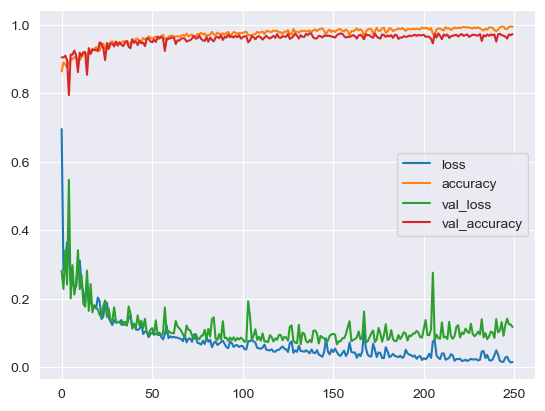

In [256]:
pd.DataFrame(history.history).plot();
# label x axis = ‘Number of Epochs'
# label y axis = loss/accuracy

In [257]:
# provide insights
# chose 'adam' as an optimizer. got better results
# above model was was run 250 epochs
# getting 99% on training and 97% on validation, so model doesn't appear to be overfitting
# seems like with more epochs there is room for improvement

In [258]:
# one way to evaluate
# this works like .score
model.evaluate(X_test_full,y_test_full)

32/32 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9660


[0.16044989228248596, 0.9660000205039978]

In [263]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(y_test_full)
print('NN Sequential')
print(classification_report(y_test, y_pred))


94/94 [==============================] - 0s 1ms/step


ValueError: in user code:

    File "C:\Users\vivian\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\vivian\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\vivian\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\vivian\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\vivian\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\vivian\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 11, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=False
      • mask=None


In [264]:
print(confusion_matrix(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [259]:
# the other way
y_pred = model.predict(X_test_full)

32/32 [==============================] - 0s 2ms/step


In [260]:
# this gives a 2d vector
# it makes 10000 predictsion for each class
y_pred.shape

(1000, 1)